# Problem Statement

Lending is one of the critical functions of any bank or financial institution. Customers are provided loans across different products (home loan, loan against property etc.) at competitive interest rates for an acceptable tenure. There is always a risk that a customer may default on the loan or may try and repay the loan in advance which leads to financial losses to the business.  

There may not be enough data or evidence available from the past which will help the firm to predict the loan default or prepayment and mitigate the above possible risk. However, it does have information about the customer demographics, loan details, EMI transactions etc. which contributes to more than 25-30 features (high-dimension data) related to a customer’s loan account. But due to high dimensions it is difficult to identify any patterns within the data. Unsupervised learning techniques like Principal Component Analysis comes to rescue here to reduce the high dimensionality and help in further analysis and pattern recognition. 

## About Data

Data file contains information about the loan transactions done by the customer. 

All important details regarding the loan i.e. loan amount, interest rate, outstanding principal, loan to value ratio (Net LTV), tenure, city where the loan was originated etc. has been provided. 

Some of the features that correspond to multiple loan transactions (e.g. rate of interest, emi amount, frequency of emi payment etc.) for a loan account are summarized and captured for each loan account.

### Import  required libraries

In [5]:
!pip install factor_analyzer 

  Using cached factor_analyzer-0.3.2.tar.gz (40 kB)
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40383 sha256=f402d4da4d4bf8fa02f8d4a23690860ca92be1a56a516ada7523b3f2f64709de
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b1\d4\b5\9da0e0e81266e87f5e85068f031077c8a2ae0eedf76ea1d294
Successfully built factor-analyzer


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 


### Read and view data

In [8]:
df = pd.read_excel("Short Term Home Loans.xlsx")

In [9]:
df.head()

,loan_account,age,gender,marital_status,qualification,gross_income,nettakehome,balance_tenure,city,completed_tenure,...,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
0,LA492,39,F,M,UG,63542.344735,63542.344735,111,MADURAI,70,...,11,10,73,17.479728,180,9.882910e+05,9.340537e+05,212745.625226,39959.331336,39959.331336
1,LA498,51,M,M,GRAD,81130.025032,81130.025032,107,MADURAI,68,...,3,11,73,17.479728,180,1.206218e+06,1.069305e+06,295078.188194,78774.632736,78774.632736
2,LA500,41,M,M,UG,56298.592500,56298.592500,50,MADURAI,70,...,13,10,73,17.479728,120,7.137100e+05,8.303592e+05,487326.621863,37918.629288,37918.629288
3,LA531,42,M,M,UG,74314.142100,74314.142100,110,MADURAI,70,...,13,17,72,17.479728,180,1.744746e+06,1.567354e+06,357068.193072,29375.950152,29375.950152
4,LA552,27,M,S,GRAD,64255.460240,64255.460240,112,MADURAI,69,...,14,10,71,17.479728,180,1.502039e+06,1.355995e+06,299516.018579,46048.309200,46048.309200


In [10]:
df.shape

(2319, 42)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2319.0,3.945106e+01,8.982396e+00,1.800000e+01,3.200000e+01,3.900000e+01,4.600000e+01,6.500000e+01
gross_income,2319.0,8.260822e+04,1.264007e+05,0.000000e+00,4.189591e+04,6.184963e+04,9.118946e+04,4.261664e+06
nettakehome,2319.0,8.134619e+04,1.268459e+05,0.000000e+00,4.109947e+04,6.050222e+04,9.046402e+04,4.261664e+06
balance_tenure,2319.0,1.466628e+02,4.513873e+01,0.000000e+00,1.290000e+02,1.500000e+02,1.670000e+02,3.070000e+02
completed_tenure,2319.0,2.950367e+01,1.349025e+01,0.000000e+00,2.200000e+01,2.800000e+01,3.700000e+01,7.000000e+01
current_interest_rate,2319.0,1.569870e+01,1.872893e+00,1.107466e+01,1.404621e+01,1.591904e+01,1.747973e+01,1.997683e+01
current_interest_rate_max,2319.0,1.578384e+01,1.832462e+00,1.107466e+01,1.435835e+01,1.591904e+01,1.747973e+01,1.997683e+01
current_interest_rate_min,2319.0,1.568473e+01,1.875045e+00,1.107466e+01,1.404621e+01,1.591904e+01,1.747973e+01,1.997683e+01
current_tenor,2319.0,1.759711e+02,4.224263e+01,1.000000e+01,1.730000e+02,1.800000e+02,1.810000e+02,3.160000e+02
diff_current_interest_rate_max_min,2319.0,1.042883e-01,5.631563e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.201107e+01


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_account                         2319 non-null   object 
 1   age                                  2319 non-null   int64  
 2   gender                               2319 non-null   object 
 3   marital_status                       2319 non-null   object 
 4   qualification                        2319 non-null   object 
 5   gross_income                         2319 non-null   float64
 6   nettakehome                          2319 non-null   float64
 7   balance_tenure                       2319 non-null   int64  
 8   city                                 2319 non-null   object 
 9   completed_tenure                     2319 non-null   int64  
 10  current_interest_rate                2319 non-null   float64
 11  current_interest_rate_max     

In [13]:
df.city.value_counts()

MUMBAI             586
HYDERABAD          268
AHMEDABAD          165
CHENNAI            164
MADURAI            157
COIMBATORE         156
SURAT              136
ERODE               85
TIRUCHIRAPPALLI     78
PUNE                78
KARUR               65
TUTICORIN           64
TIRUPUR             63
NAMAKKAL            56
WARANGAL            56
BANGALORE           45
VISHAKHAPATNAM      45
Hyd                 31
Mum                 21
Name: city, dtype: int64

In [14]:
df.gender.value_counts()

M    1994
F     325
Name: gender, dtype: int64

In [15]:
df.marital_status.value_counts()

M    2086
S     233
Name: marital_status, dtype: int64

In [16]:
df.qualification.value_counts()

UG          1548
GRAD         409
POSTGRAD     181
OTHERS       150
PRF           18
ENG            6
MAT            5
DOCTRATE       2
Name: qualification, dtype: int64

#### Observations:


### Data Cleanup

In [17]:
df.city.replace(to_replace='Mum',value='MUMBAI',inplace=True)
df.city.replace(to_replace='Hyd',value='HYDERABAD',inplace=True)
df.city.value_counts()

MUMBAI             607
HYDERABAD          299
AHMEDABAD          165
CHENNAI            164
MADURAI            157
COIMBATORE         156
SURAT              136
ERODE               85
TIRUCHIRAPPALLI     78
PUNE                78
KARUR               65
TUTICORIN           64
TIRUPUR             63
NAMAKKAL            56
WARANGAL            56
BANGALORE           45
VISHAKHAPATNAM      45
Name: city, dtype: int64

In [18]:
df.drop(['diff_current_interest_rate_max_min','diff_original_current_interest_rate','diff_original_current_tenor','excess_adjusted_amt'], axis=1, inplace=True)

In [19]:
df.gross_income.replace(to_replace=0, value=df.gross_income.median(),inplace=True)
df.nettakehome.replace(to_replace=0, value=df.nettakehome.median(),inplace=True)

### EDA

#### Univariate Analysis

In [20]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of age
----------------------------------------------------------------------------
count    2319.000000
mean       39.451056
std         8.982396
min        18.000000
25%        32.000000
50%        39.000000
75%        46.000000
max        65.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


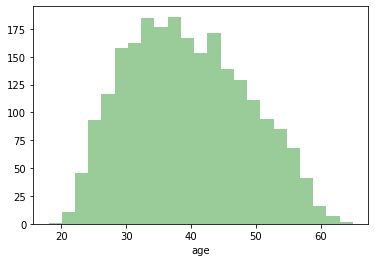

BoxPlot of age
----------------------------------------------------------------------------


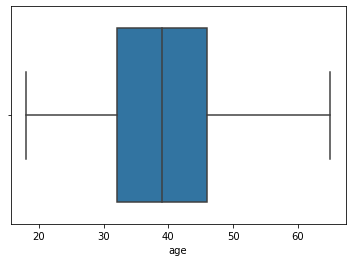

In [21]:
univariateAnalysis_numeric('age',20)

In [22]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

33

Description of age
----------------------------------------------------------------------------
count    2319.000000
mean       39.451056
std         8.982396
min        18.000000
25%        32.000000
50%        39.000000
75%        46.000000
max        65.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


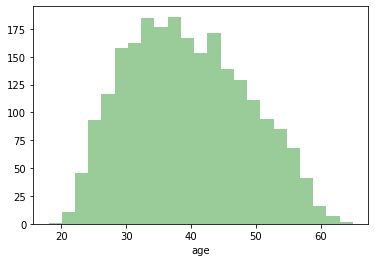

BoxPlot of age
----------------------------------------------------------------------------


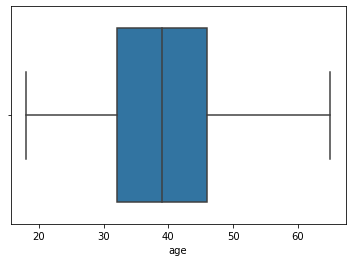

Description of gross_income
----------------------------------------------------------------------------
count    2.319000e+03
mean     8.274157e+04
std      1.263460e+05
min      1.250579e+01
25%      4.203628e+04
50%      6.184963e+04
75%      9.118946e+04
max      4.261664e+06
Name: gross_income, dtype: float64 Distribution of gross_income
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


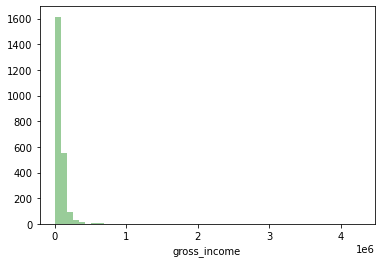

BoxPlot of gross_income
----------------------------------------------------------------------------


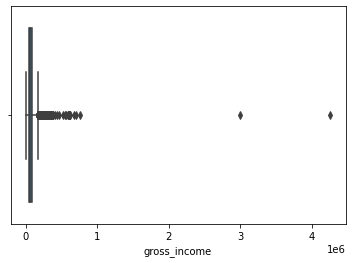

Description of nettakehome
----------------------------------------------------------------------------
count    2.319000e+03
mean     8.194625e+04
std      1.266025e+05
min      1.246076e-01
25%      4.198749e+04
50%      6.050222e+04
75%      9.046402e+04
max      4.261664e+06
Name: nettakehome, dtype: float64 Distribution of nettakehome
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


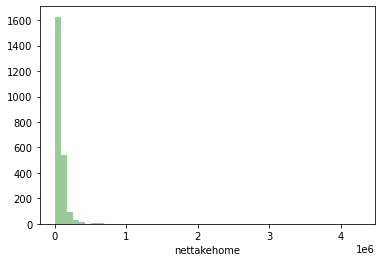

BoxPlot of nettakehome
----------------------------------------------------------------------------


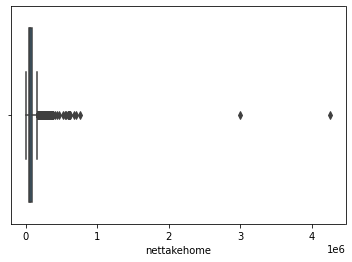

Description of balance_tenure
----------------------------------------------------------------------------
count    2319.000000
mean      146.662786
std        45.138729
min         0.000000
25%       129.000000
50%       150.000000
75%       167.000000
max       307.000000
Name: balance_tenure, dtype: float64 Distribution of balance_tenure
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


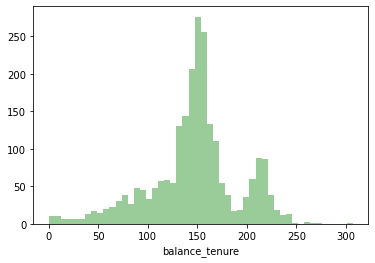

BoxPlot of balance_tenure
----------------------------------------------------------------------------


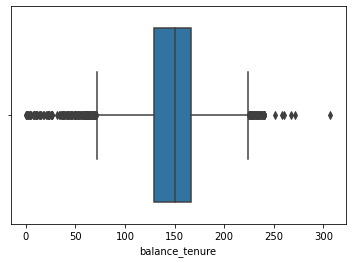

Description of completed_tenure
----------------------------------------------------------------------------
count    2319.000000
mean       29.503665
std        13.490253
min         0.000000
25%        22.000000
50%        28.000000
75%        37.000000
max        70.000000
Name: completed_tenure, dtype: float64 Distribution of completed_tenure
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


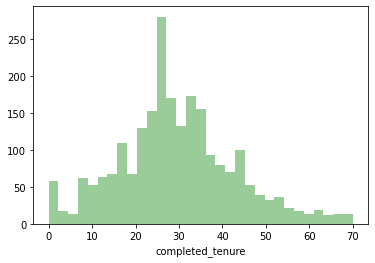

BoxPlot of completed_tenure
----------------------------------------------------------------------------


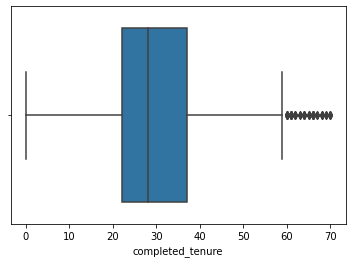

Description of current_interest_rate
----------------------------------------------------------------------------
count    2319.000000
mean       15.698703
std         1.872893
min        11.074656
25%        14.046210
50%        15.919038
75%        17.479728
max        19.976832
Name: current_interest_rate, dtype: float64 Distribution of current_interest_rate
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


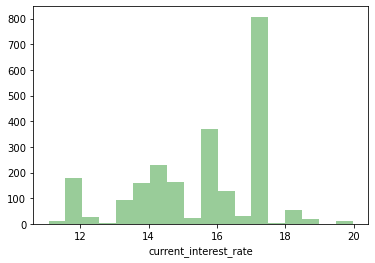

BoxPlot of current_interest_rate
----------------------------------------------------------------------------


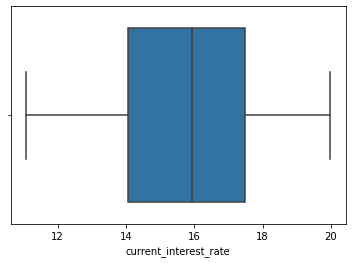

Description of current_interest_rate_max
----------------------------------------------------------------------------
count    2319.000000
mean       15.783840
std         1.832462
min        11.074656
25%        14.358348
50%        15.919038
75%        17.479728
max        19.976832
Name: current_interest_rate_max, dtype: float64 Distribution of current_interest_rate_max
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


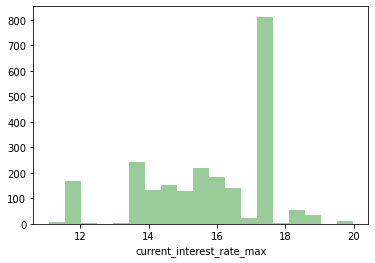

BoxPlot of current_interest_rate_max
----------------------------------------------------------------------------


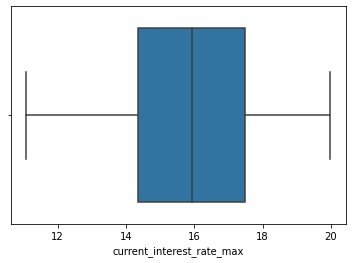

Description of current_interest_rate_min
----------------------------------------------------------------------------
count    2319.000000
mean       15.684731
std         1.875045
min        11.074656
25%        14.046210
50%        15.919038
75%        17.479728
max        19.976832
Name: current_interest_rate_min, dtype: float64 Distribution of current_interest_rate_min
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


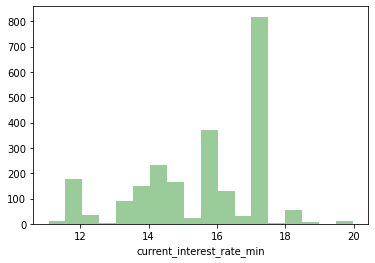

BoxPlot of current_interest_rate_min
----------------------------------------------------------------------------


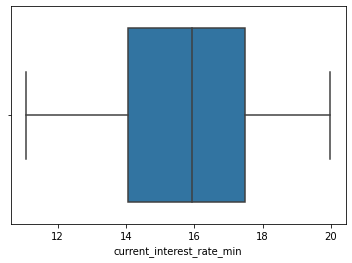

Description of current_tenor
----------------------------------------------------------------------------
count    2319.000000
mean      175.971108
std        42.242628
min        10.000000
25%       173.000000
50%       180.000000
75%       181.000000
max       316.000000
Name: current_tenor, dtype: float64 Distribution of current_tenor
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


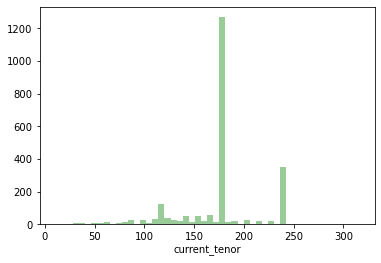

BoxPlot of current_tenor
----------------------------------------------------------------------------


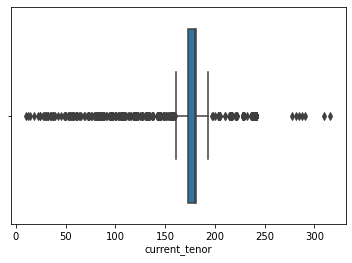

Description of diff_emi_amount_max_min
----------------------------------------------------------------------------
count    2.319000e+03
mean     5.635589e+04
std      1.959045e+05
min      0.000000e+00
25%      1.029850e+04
50%      1.735000e+04
75%      2.860478e+04
max      3.229383e+06
Name: diff_emi_amount_max_min, dtype: float64 Distribution of diff_emi_amount_max_min
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


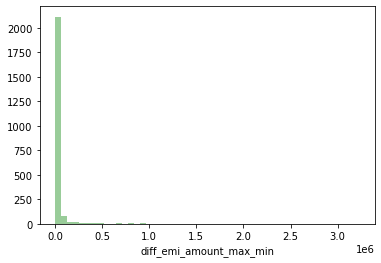

BoxPlot of diff_emi_amount_max_min
----------------------------------------------------------------------------


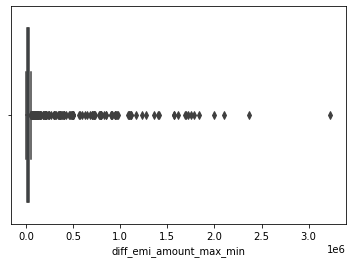

Description of emi_amount
----------------------------------------------------------------------------
count      2319.000000
mean      18012.023109
std       12373.175124
min          14.370000
25%        9727.000000
50%       14650.000000
75%       22640.000000
max      120000.000000
Name: emi_amount, dtype: float64 Distribution of emi_amount
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


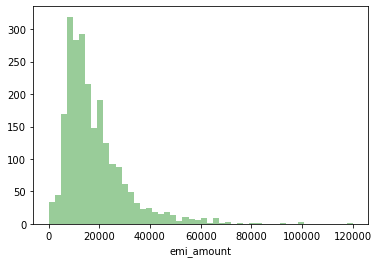

BoxPlot of emi_amount
----------------------------------------------------------------------------


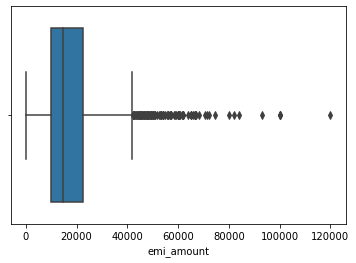

Description of emi_dueamt
----------------------------------------------------------------------------
count    2.319000e+03
mean     1.191197e+06
std      1.064387e+06
min      0.000000e+00
25%      5.517018e+05
50%      8.936884e+05
75%      1.453225e+06
max      9.853225e+06
Name: emi_dueamt, dtype: float64 Distribution of emi_dueamt
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


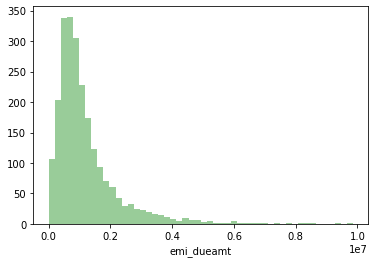

BoxPlot of emi_dueamt
----------------------------------------------------------------------------


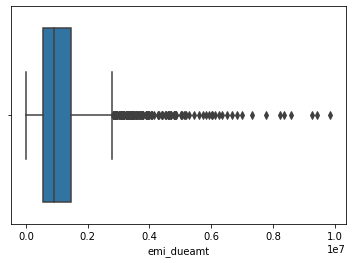

Description of emi_received_amt
----------------------------------------------------------------------------
count    2.319000e+03
mean     1.132347e+06
std      9.800945e+05
min      0.000000e+00
25%      5.325923e+05
50%      8.662891e+05
75%      1.397185e+06
max      9.853225e+06
Name: emi_received_amt, dtype: float64 Distribution of emi_received_amt
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


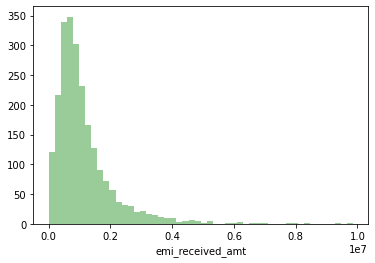

BoxPlot of emi_received_amt
----------------------------------------------------------------------------


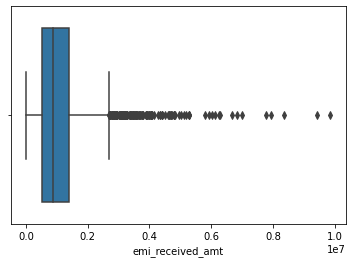

Description of excess_available
----------------------------------------------------------------------------
count    2.319000e+03
mean     1.865469e+05
std      7.175169e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.727088e+02
75%      3.881751e+03
max      1.021953e+07
Name: excess_available, dtype: float64 Distribution of excess_available
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


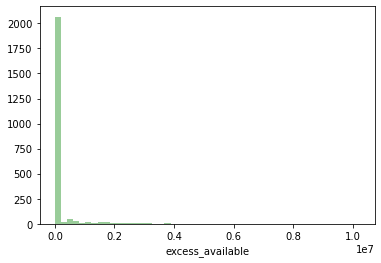

BoxPlot of excess_available
----------------------------------------------------------------------------


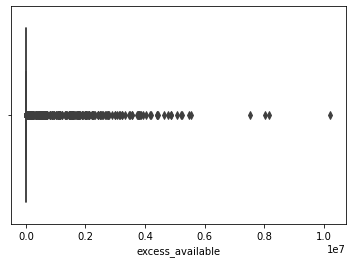

Description of foir
----------------------------------------------------------------------------
count    2319.000000
mean        0.426229
std         0.146320
min         0.000000
25%         0.340000
50%         0.420000
75%         0.490000
max         1.001000
Name: foir, dtype: float64 Distribution of foir
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


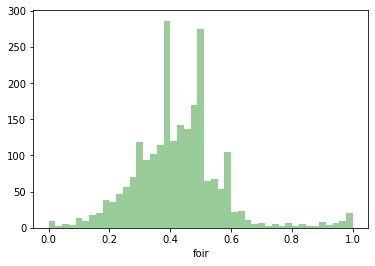

BoxPlot of foir
----------------------------------------------------------------------------


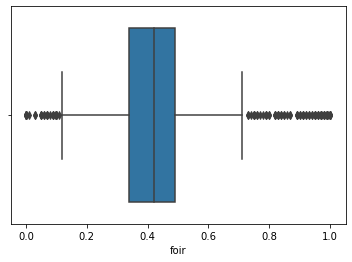

Description of last_receipt_amount
----------------------------------------------------------------------------
count    2.319000e+03
mean     4.114352e+04
std      1.748835e+05
min      2.000000e+00
25%      9.316000e+03
50%      1.440500e+04
75%      2.307700e+04
max      3.229945e+06
Name: last_receipt_amount, dtype: float64 Distribution of last_receipt_amount
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


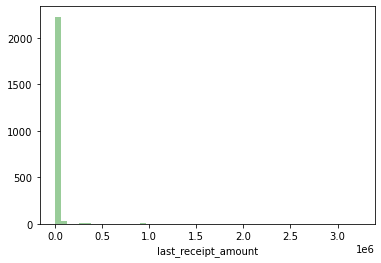

BoxPlot of last_receipt_amount
----------------------------------------------------------------------------


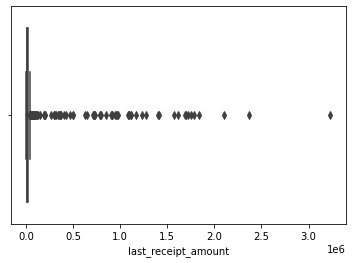

Description of loan_amt
----------------------------------------------------------------------------
count    2.319000e+03
mean     2.194991e+06
std      1.349637e+06
min      1.756516e+05
25%      1.238569e+06
50%      1.801555e+06
75%      2.818683e+06
max      1.089366e+07
Name: loan_amt, dtype: float64 Distribution of loan_amt
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


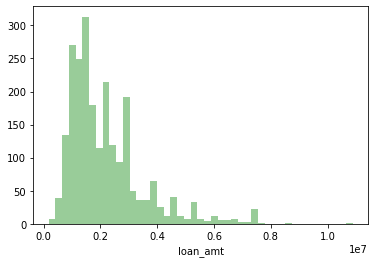

BoxPlot of loan_amt
----------------------------------------------------------------------------


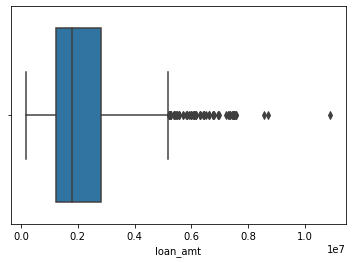

Description of max_emi_amount
----------------------------------------------------------------------------
count    2.319000e+03
mean     5.807497e+04
std      1.960221e+05
min      5.620000e+02
25%      1.157300e+04
50%      1.897500e+04
75%      2.967650e+04
max      3.229945e+06
Name: max_emi_amount, dtype: float64 Distribution of max_emi_amount
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


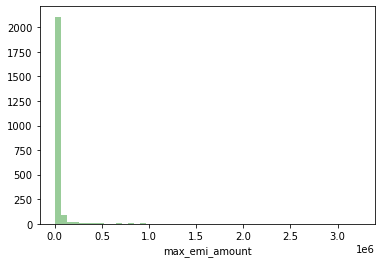

BoxPlot of max_emi_amount
----------------------------------------------------------------------------


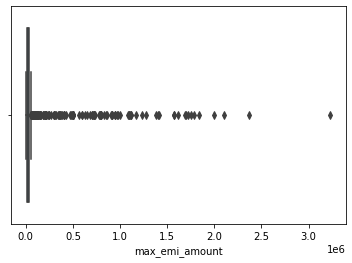

Description of min_emi_amount
----------------------------------------------------------------------------
count     2319.000000
mean      1723.590298
std       5332.764547
min          0.090000
25%        115.000000
50%        115.000000
75%        573.000000
max      84001.000000
Name: min_emi_amount, dtype: float64 Distribution of min_emi_amount
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


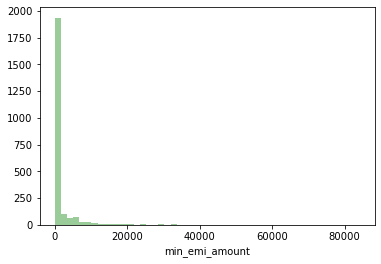

BoxPlot of min_emi_amount
----------------------------------------------------------------------------


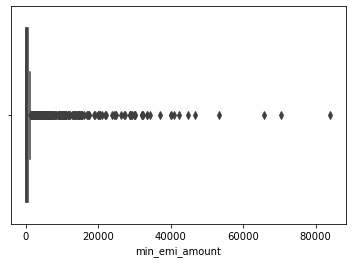

Description of monthopening
----------------------------------------------------------------------------
count    2.319000e+03
mean     2.035442e+06
std      1.286849e+06
min      1.514357e+05
25%      1.135780e+06
50%      1.688189e+06
75%      2.620309e+06
max      1.080242e+07
Name: monthopening, dtype: float64 Distribution of monthopening
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


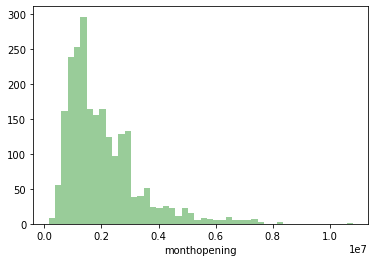

BoxPlot of monthopening
----------------------------------------------------------------------------


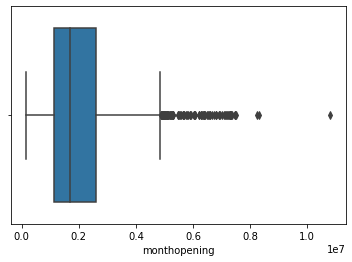

Description of net_disbursed_amt
----------------------------------------------------------------------------
count    2.319000e+03
mean     2.189517e+06
std      1.349531e+06
min      1.756516e+05
25%      1.231063e+06
50%      1.801555e+06
75%      2.800199e+06
max      1.089366e+07
Name: net_disbursed_amt, dtype: float64 Distribution of net_disbursed_amt
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


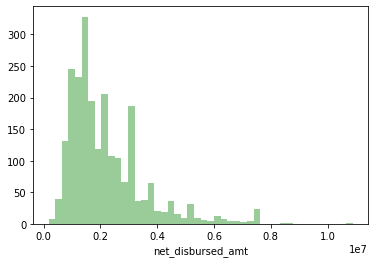

BoxPlot of net_disbursed_amt
----------------------------------------------------------------------------


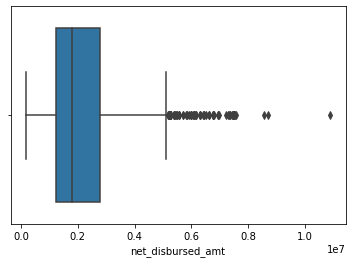

Description of net_ltv
----------------------------------------------------------------------------
count    2319.000000
mean       51.570013
std        18.757921
min         5.220000
25%        36.800000
50%        52.070000
75%        68.890000
max        84.390000
Name: net_ltv, dtype: float64 Distribution of net_ltv
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


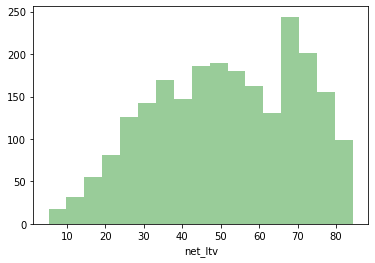

BoxPlot of net_ltv
----------------------------------------------------------------------------


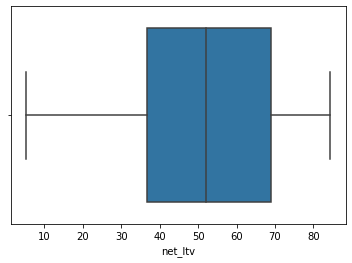

Description of net_receivable
----------------------------------------------------------------------------
count    2.319000e+03
mean     4.978290e+03
std      5.257671e+05
min     -7.133502e+06
25%     -3.259933e+02
50%     -4.417104e-01
75%      0.000000e+00
max      8.252080e+06
Name: net_receivable, dtype: float64 Distribution of net_receivable
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


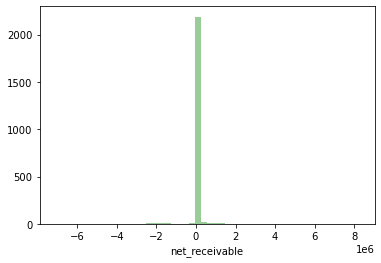

BoxPlot of net_receivable
----------------------------------------------------------------------------


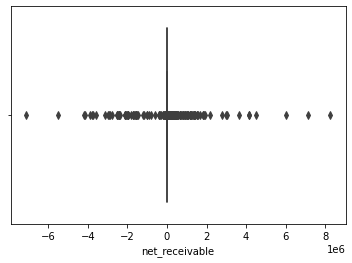

Description of num_emi_changes
----------------------------------------------------------------------------
count    2319.000000
mean        5.356188
std         3.809970
min         0.000000
25%         3.000000
50%         4.000000
75%         7.000000
max        27.000000
Name: num_emi_changes, dtype: float64 Distribution of num_emi_changes
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


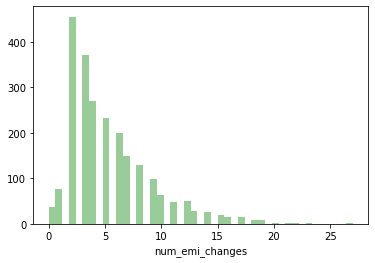

BoxPlot of num_emi_changes
----------------------------------------------------------------------------


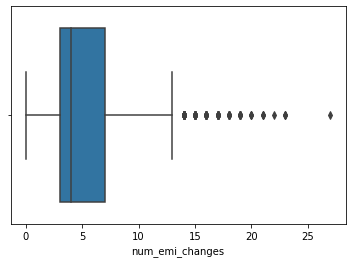

Description of num_low_freq_transactions
----------------------------------------------------------------------------
count    2319.000000
mean        4.567486
std         3.610644
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        21.000000
Name: num_low_freq_transactions, dtype: float64 Distribution of num_low_freq_transactions
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


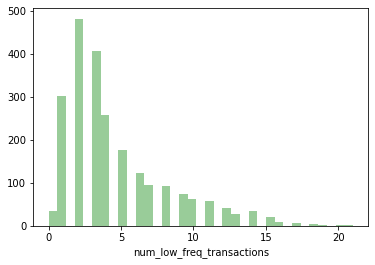

BoxPlot of num_low_freq_transactions
----------------------------------------------------------------------------


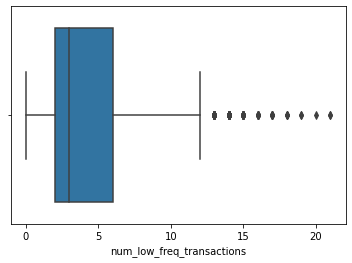

Description of num_of_emi_transactions
----------------------------------------------------------------------------
count    2319.000000
mean       32.156102
std        13.251947
min         0.000000
25%        24.000000
50%        31.000000
75%        40.000000
max        73.000000
Name: num_of_emi_transactions, dtype: float64 Distribution of num_of_emi_transactions
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


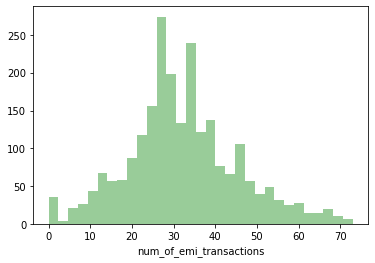

BoxPlot of num_of_emi_transactions
----------------------------------------------------------------------------


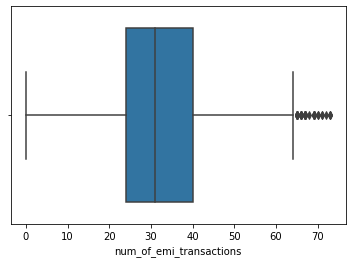

Description of orignal_interest_rate
----------------------------------------------------------------------------
count    2319.000000
mean       15.768140
std         1.814290
min        11.074656
25%        14.358348
50%        15.919038
75%        17.479728
max        19.976832
Name: orignal_interest_rate, dtype: float64 Distribution of orignal_interest_rate
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


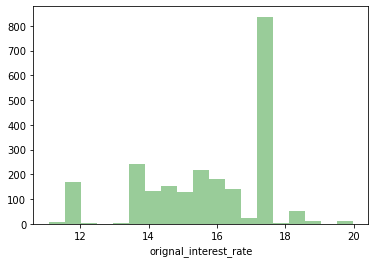

BoxPlot of orignal_interest_rate
----------------------------------------------------------------------------


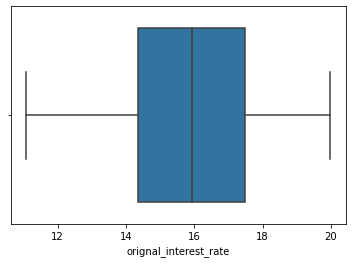

Description of orignal_tenor
----------------------------------------------------------------------------
count    2319.000000
mean      180.867615
std        35.859160
min        60.000000
25%       180.000000
50%       180.000000
75%       180.000000
max       240.000000
Name: orignal_tenor, dtype: float64 Distribution of orignal_tenor
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


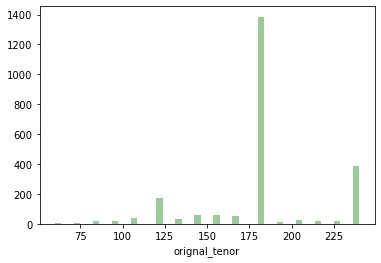

BoxPlot of orignal_tenor
----------------------------------------------------------------------------


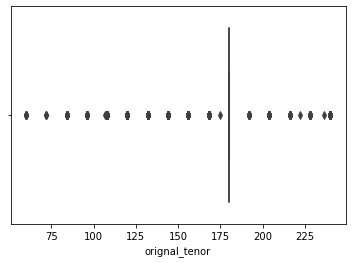

Description of outstanding_principal
----------------------------------------------------------------------------
count    2.319000e+03
mean     1.949442e+06
std      1.289269e+06
min      0.000000e+00
25%      1.065798e+06
50%      1.606862e+06
75%      2.546081e+06
max      1.080242e+07
Name: outstanding_principal, dtype: float64 Distribution of outstanding_principal
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


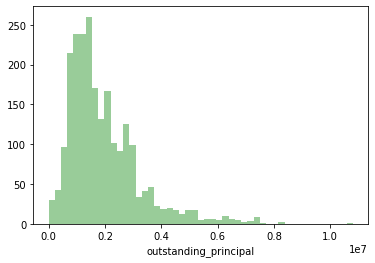

BoxPlot of outstanding_principal
----------------------------------------------------------------------------


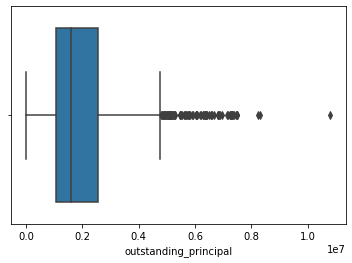

Description of paid_interest
----------------------------------------------------------------------------
count    2.319000e+03
mean     6.538977e+05
std      5.553356e+05
min      0.000000e+00
25%      3.083669e+05
50%      5.082382e+05
75%      8.067100e+05
max      5.588191e+06
Name: paid_interest, dtype: float64 Distribution of paid_interest
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


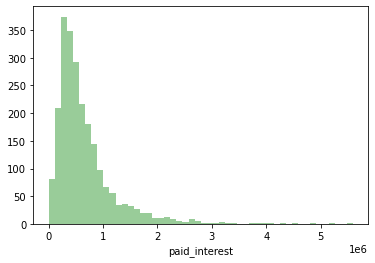

BoxPlot of paid_interest
----------------------------------------------------------------------------


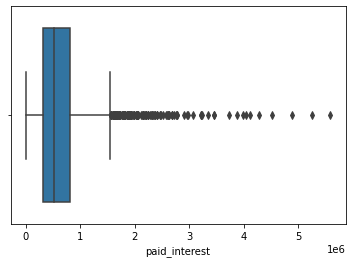

Description of paid_principal
----------------------------------------------------------------------------
count    2.319000e+03
mean     2.389494e+05
std      4.546814e+05
min      0.000000e+00
25%      6.463679e+04
50%      1.159271e+05
75%      2.208857e+05
max      7.458322e+06
Name: paid_principal, dtype: float64 Distribution of paid_principal
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


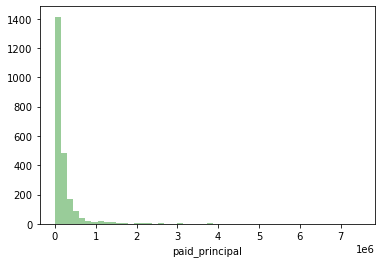

BoxPlot of paid_principal
----------------------------------------------------------------------------


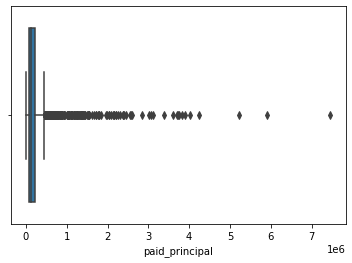

Description of pre_emi_dueamt
----------------------------------------------------------------------------
count    2.319000e+03
mean     5.630330e+04
std      1.176218e+05
min      0.000000e+00
25%      5.852663e+03
50%      1.687113e+04
75%      5.423541e+04
max      1.624202e+06
Name: pre_emi_dueamt, dtype: float64 Distribution of pre_emi_dueamt
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


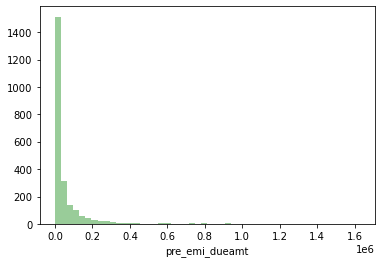

BoxPlot of pre_emi_dueamt
----------------------------------------------------------------------------


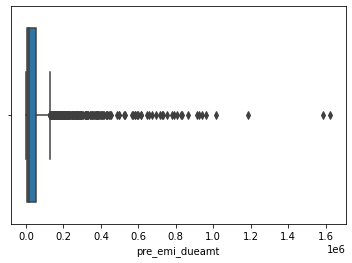

Description of pre_emi_received_amt
----------------------------------------------------------------------------
count    2.319000e+03
mean     5.562086e+04
std      1.155979e+05
min      0.000000e+00
25%      5.848246e+03
50%      1.687113e+04
75%      5.423541e+04
max      1.585701e+06
Name: pre_emi_received_amt, dtype: float64 Distribution of pre_emi_received_amt
----------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


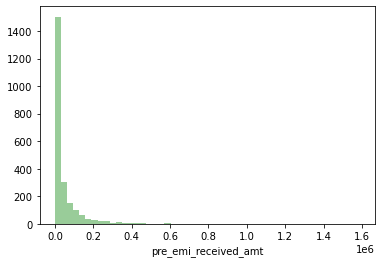

BoxPlot of pre_emi_received_amt
----------------------------------------------------------------------------


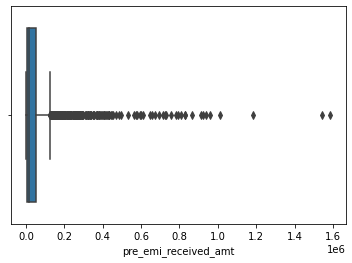

In [23]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

#### Observations


In [24]:
df.num_low_freq_transactions.describe()

count    2319.000000
mean        4.567486
std         3.610644
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        21.000000
Name: num_low_freq_transactions, dtype: float64

In [25]:
# Probable customers who are paying off their loans earlier
df[df.num_low_freq_transactions > 6]

,loan_account,age,gender,marital_status,qualification,gross_income,nettakehome,balance_tenure,city,completed_tenure,...,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
0,LA492,39,F,M,UG,63542.344735,63542.344735,111,MADURAI,70,...,11,10,73,17.479728,180,9.882910e+05,9.340537e+05,212745.625226,39959.331336,39959.331336
1,LA498,51,M,M,GRAD,81130.025032,81130.025032,107,MADURAI,68,...,3,11,73,17.479728,180,1.206218e+06,1.069305e+06,295078.188194,78774.632736,78774.632736
2,LA500,41,M,M,UG,56298.592500,56298.592500,50,MADURAI,70,...,13,10,73,17.479728,120,7.137100e+05,8.303592e+05,487326.621863,37918.629288,37918.629288
3,LA531,42,M,M,UG,74314.142100,74314.142100,110,MADURAI,70,...,13,17,72,17.479728,180,1.744746e+06,1.567354e+06,357068.193072,29375.950152,29375.950152
4,LA552,27,M,S,GRAD,64255.460240,64255.460240,112,MADURAI,69,...,14,10,71,17.479728,180,1.502039e+06,1.355995e+06,299516.018579,46048.309200,46048.309200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,LA5669,32,M,M,UG,40122.505579,40122.505579,220,MUMBAI,20,...,13,7,20,14.358348,240,2.180859e+06,3.936277e+05,47058.116851,5236.476792,5236.476792
2301,LA5697,44,M,M,GRAD,82314.051991,82314.047487,240,MUMBAI,0,...,4,8,18,14.358348,240,1.524213e+06,7.913330e+04,0.000000,376421.185776,116412.775920
2303,LA5699,35,M,M,MAT,74407.477660,74407.477660,223,MUMBAI,17,...,7,8,22,14.046210,240,2.753524e+06,5.205503e+05,53899.521812,151519.918512,151519.918512
2308,LA5709,53,M,M,UG,73053.053628,73053.053628,187,NAMAKKAL,17,...,9,9,22,16.231176,204,2.488135e+06,5.596275e+05,64067.798265,139688.705448,139688.705448


#### Observation


In [27]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [28]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['loan_account', 'gender', 'marital_status', 'qualification', 'city']

In [29]:
lstcatcolumns.remove('loan_account')

Details of gender
----------------------------------------------------------------
M    1994
F     325
Name: gender, dtype: int64


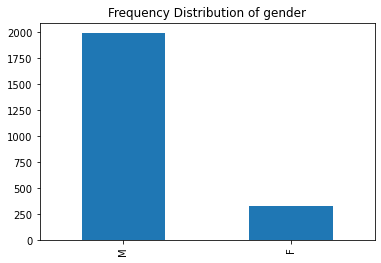

       
Details of marital_status
----------------------------------------------------------------
M    2086
S     233
Name: marital_status, dtype: int64


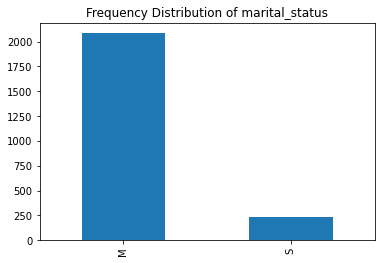

       
Details of qualification
----------------------------------------------------------------
UG          1548
GRAD         409
POSTGRAD     181
OTHERS       150
PRF           18
ENG            6
MAT            5
DOCTRATE       2
Name: qualification, dtype: int64


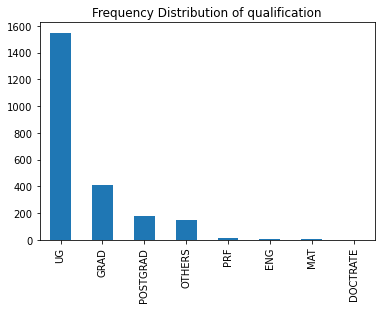

       
Details of city
----------------------------------------------------------------
MUMBAI             607
HYDERABAD          299
AHMEDABAD          165
CHENNAI            164
MADURAI            157
COIMBATORE         156
SURAT              136
ERODE               85
TIRUCHIRAPPALLI     78
PUNE                78
KARUR               65
TUTICORIN           64
TIRUPUR             63
NAMAKKAL            56
WARANGAL            56
BANGALORE           45
VISHAKHAPATNAM      45
Name: city, dtype: int64


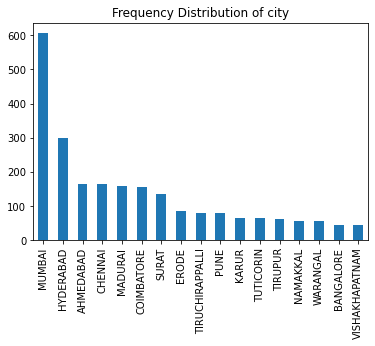

In [30]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

#### Bivariate Analysis

In [31]:
corr = df_num.corr(method='pearson')

In [1]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

NameError: name 'np' is not defined

#### Observation



### Outlier Treatment

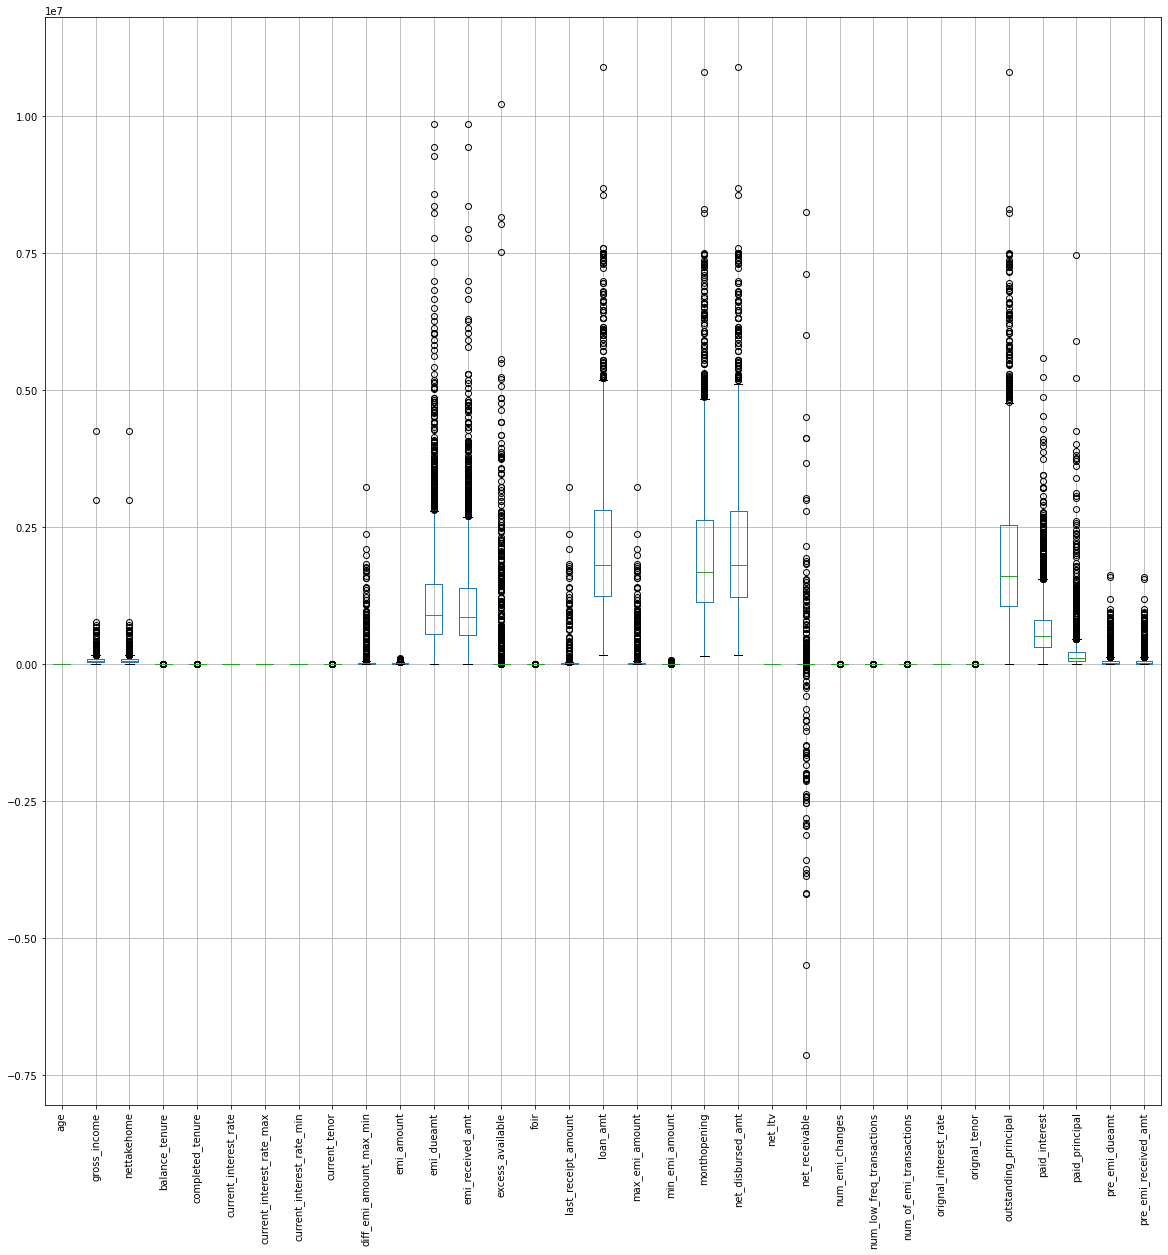

In [33]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [34]:
no_outlier = ['age','current_interest_rate','current_interest_rate_max','current_interest_rate_min','net_ltv','orignal_interest_rate']

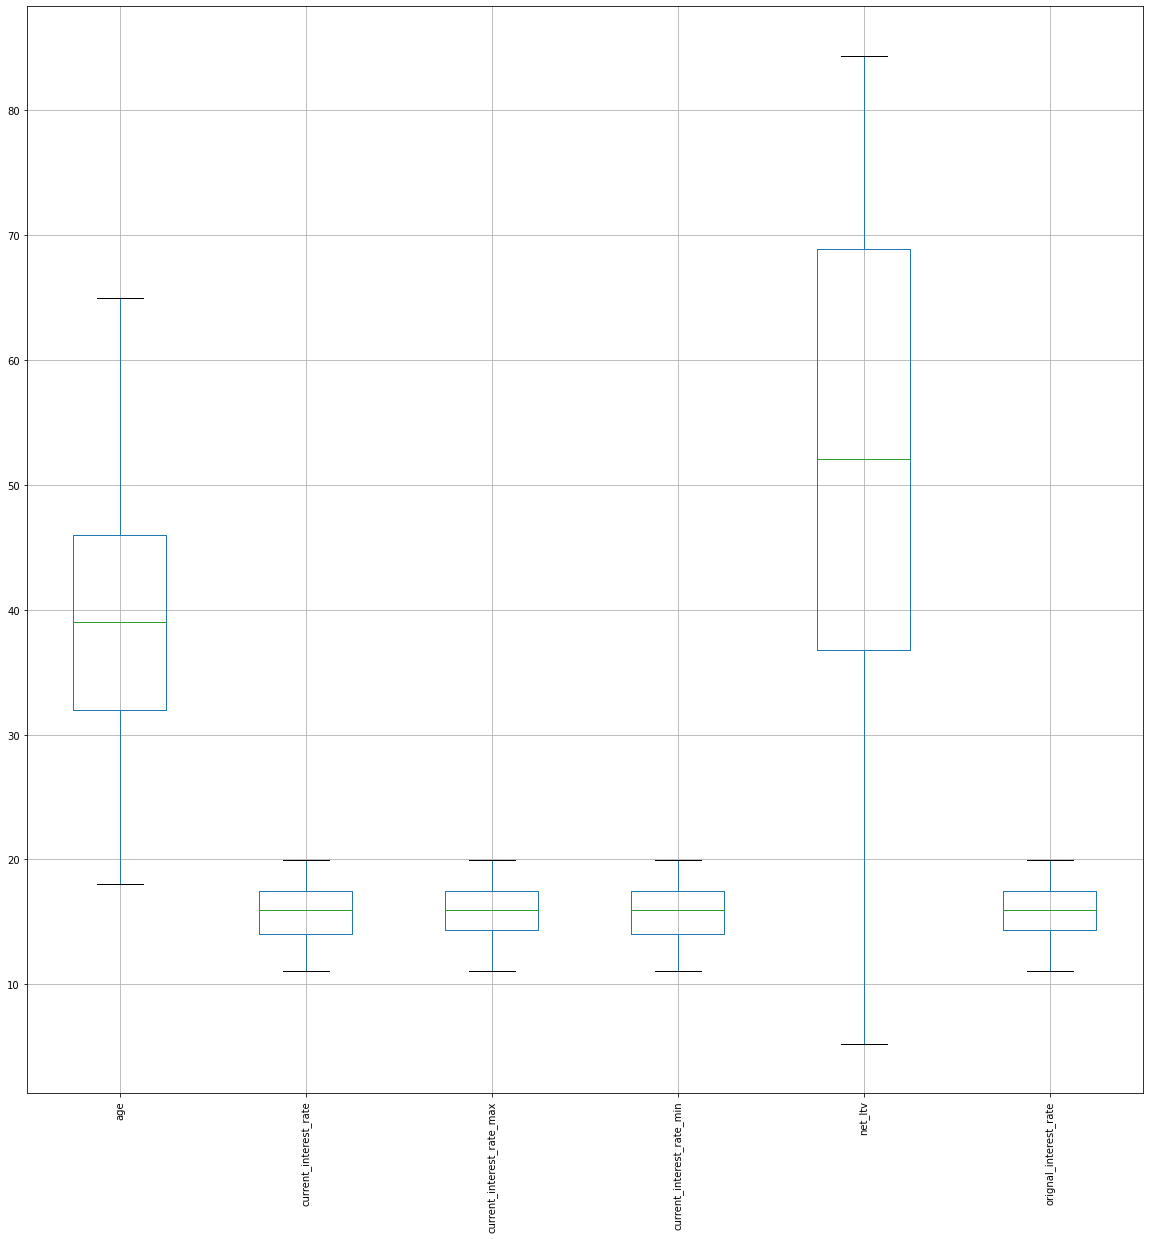

In [35]:
df_num[no_outlier].boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

To treat outliers lets define a function **'treat_outlier'**. 

- For the higher outliers we will treat it to get it at 95 percentile value. 

- Lower level outliers will be treated to get it at 5 percentile value.

In [36]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [38]:
outlier_list = [x for x in df_num.columns if x not in no_outlier]

In [39]:
for i in df_num[outlier_list]:    
    df_num[i]=treat_outlier(df_num[i])

<ipython-input-39-a8724f2eb622>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[i]=treat_outlier(df_num[i])


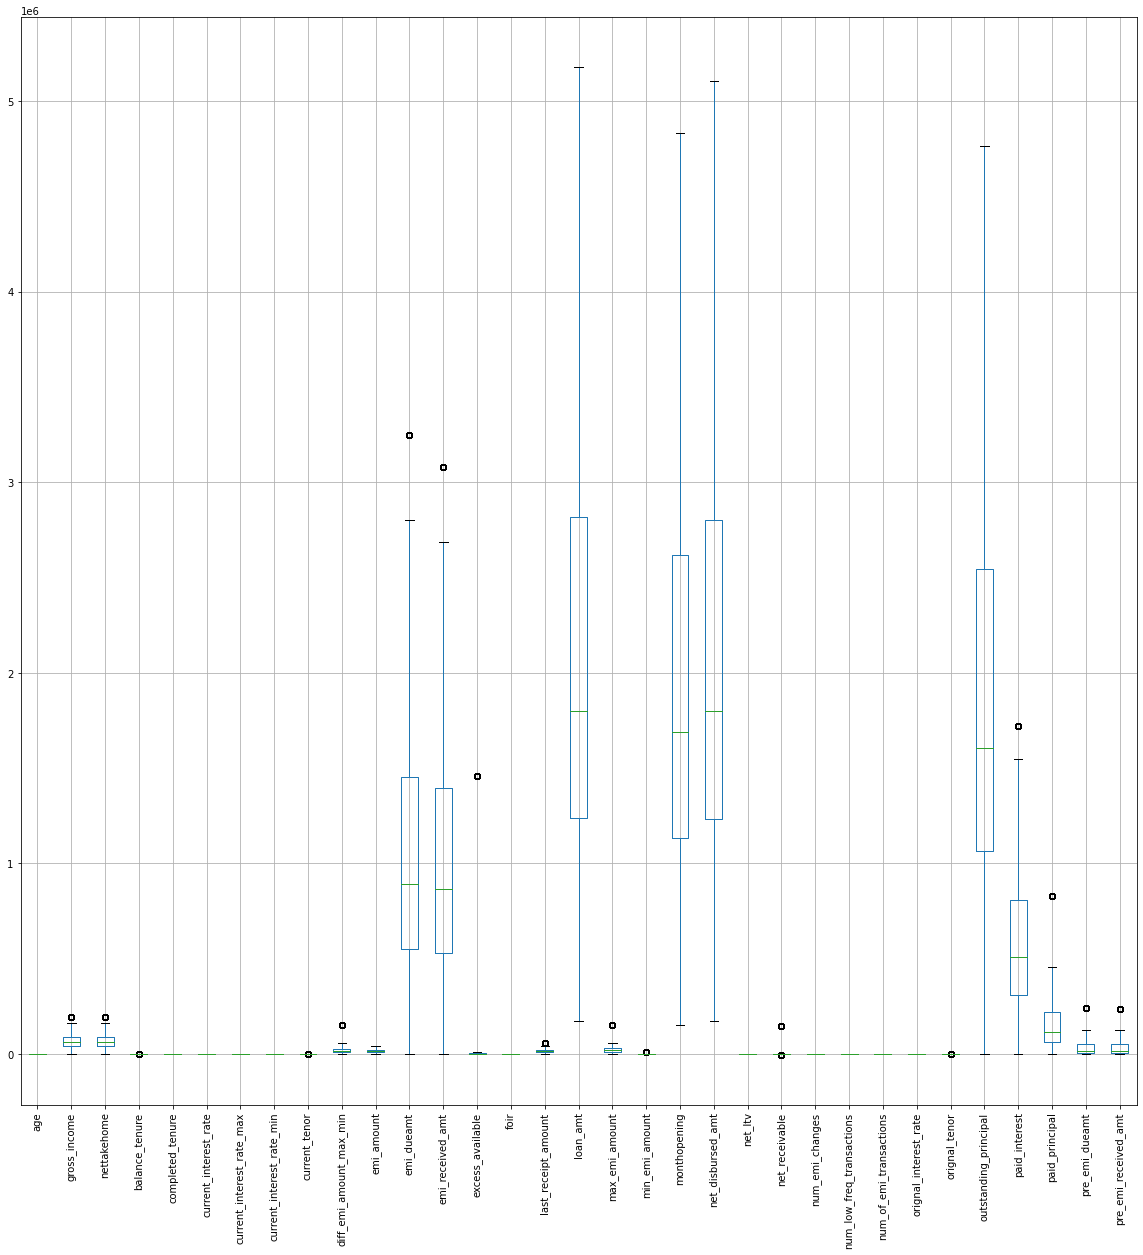

In [40]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

## PCA

In [41]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2319 non-null   int64  
 1   gross_income               2319 non-null   float64
 2   nettakehome                2319 non-null   float64
 3   balance_tenure             2319 non-null   float64
 4   completed_tenure           2319 non-null   float64
 5   current_interest_rate      2319 non-null   float64
 6   current_interest_rate_max  2319 non-null   float64
 7   current_interest_rate_min  2319 non-null   float64
 8   current_tenor              2319 non-null   float64
 9   diff_emi_amount_max_min    2319 non-null   float64
 10  emi_amount                 2319 non-null   float64
 11  emi_dueamt                 2319 non-null   float64
 12  emi_received_amt           2319 non-null   float64
 13  excess_available           2319 non-null   float

In [42]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,age,gross_income,nettakehome,balance_tenure,completed_tenure,current_interest_rate,current_interest_rate_max,current_interest_rate_min,current_tenor,diff_emi_amount_max_min,...,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
0,-0.050226,-0.239976,-0.220224,-0.885696,1.936521,0.951154,0.925669,0.957515,0.183447,-0.487809,...,1.736155,1.702129,1.963788,0.943596,-0.001359,-0.822279,0.727758,0.033630,-0.135506,-0.128106
1,1.286008,0.143740,0.158342,-0.983011,1.936521,-0.382421,0.925669,-0.374529,0.054735,-0.439942,...,-0.656620,2.008377,1.963788,0.943596,-0.001359,-0.622608,1.042425,0.383527,0.388638,0.410165
2,0.172479,-0.398016,-0.376142,-2.077804,1.936521,0.951154,0.925669,0.957515,-1.639966,-0.437860,...,2.334348,1.702129,1.963788,0.943596,-1.577073,-1.073859,0.486510,2.661439,-0.163063,-0.156406
3,0.283832,-0.004964,0.011633,-0.910025,1.936521,0.951154,0.925669,0.957515,0.161995,0.166150,...,2.334348,2.314625,1.963788,0.943596,-0.001359,-0.129192,2.556239,0.646972,-0.278420,-0.274871
4,-1.386461,-0.224418,-0.204874,-0.861367,1.936521,0.951154,0.925669,0.957515,0.183447,0.018416,...,2.334348,1.702129,1.963788,0.943596,-0.001359,-0.351567,1.709418,0.402387,-0.053284,-0.043667


In [43]:
df_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2319 non-null   float64
 1   gross_income               2319 non-null   float64
 2   nettakehome                2319 non-null   float64
 3   balance_tenure             2319 non-null   float64
 4   completed_tenure           2319 non-null   float64
 5   current_interest_rate      2319 non-null   float64
 6   current_interest_rate_max  2319 non-null   float64
 7   current_interest_rate_min  2319 non-null   float64
 8   current_tenor              2319 non-null   float64
 9   diff_emi_amount_max_min    2319 non-null   float64
 10  emi_amount                 2319 non-null   float64
 11  emi_dueamt                 2319 non-null   float64
 12  emi_received_amt           2319 non-null   float64
 13  excess_available           2319 non-null   float

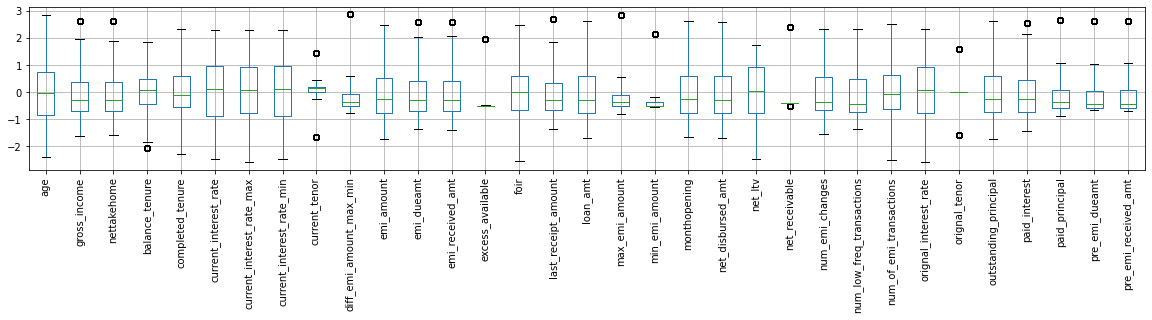

In [44]:
df_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

### Statistical tests to be done before PCA

#### Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [45]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

0.0

#### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [47]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

0.8184659398240984

In [50]:
df_num_scaled.T

,0,1,2,3,4,5,6,7,8,9,...,2309,2310,2311,2312,2313,2314,2315,2316,2317,2318
age,-0.050226,1.286008,0.172479,0.283832,-1.386461,-1.497814,-0.050226,0.395185,0.506538,0.172479,...,-0.272932,-0.718344,-0.384285,0.061126,0.951950,2.399537,-0.606991,-1.831873,1.397361,1.397361
gross_income,-0.239976,0.143740,-0.398016,-0.004964,-0.224418,-0.868368,-0.479902,1.043174,0.338956,-1.509927,...,-0.823822,-0.387993,-0.194284,-0.468438,0.389955,-0.479902,-0.276907,-0.823849,0.044167,-0.868892
nettakehome,-0.220224,0.158342,-0.376142,0.011633,-0.204874,-0.840179,-0.456928,1.045700,-0.285661,-1.473126,...,-0.796232,-0.366254,-0.175145,-0.445618,0.401250,-0.456928,-0.285661,-0.796258,0.060105,-0.840697
balance_tenure,-0.885696,-0.983011,-2.077804,-0.910025,-0.861367,-0.910025,-0.764052,-0.910025,-2.077804,-2.077804,...,-0.885696,1.741807,1.741807,-1.177641,0.865973,-2.077804,1.741807,0.282083,0.282083,-0.326135
completed_tenure,1.936521,1.936521,1.936521,1.936521,1.936521,1.936521,1.936521,1.936521,1.545990,1.936521,...,-0.640983,-0.640983,-0.640983,-0.640983,-0.640983,-0.640983,-2.281212,-0.640983,-0.640983,-0.640983
current_interest_rate,0.951154,-0.382421,0.951154,0.951154,0.951154,0.951154,0.951154,0.951154,0.951154,0.951154,...,0.251027,-1.749335,-1.415941,-1.749335,-1.749335,0.251027,-0.715815,-0.049027,-0.382421,-1.215905
current_interest_rate_max,0.925669,0.925669,0.925669,0.925669,0.925669,0.925669,0.925669,0.925669,0.925669,0.925669,...,0.210095,-1.834402,-1.493652,-1.834402,-1.834402,0.210095,-0.778079,-0.096579,-0.437329,-1.289203
current_interest_rate_min,0.957515,-0.374529,0.957515,0.957515,0.957515,0.957515,0.957515,0.957515,0.957515,0.957515,...,0.258192,-1.739875,-1.406863,-1.739875,-1.739875,0.258192,-0.707540,-0.041518,-0.374529,-1.207057
current_tenor,0.183447,0.054735,-1.639966,0.161995,0.183447,0.161995,0.161995,0.097639,-1.639966,-1.639966,...,-1.639966,1.449109,1.449109,-1.639966,1.449109,-1.639966,1.449109,0.161995,0.161995,-1.639966
diff_emi_amount_max_min,-0.487809,-0.439942,-0.437860,0.166150,0.018416,-0.161377,-0.740459,2.880595,2.880595,-0.164535,...,-0.533866,-0.267978,-0.285024,-0.515140,-0.521617,-0.528533,-0.173009,-0.540708,-0.177880,-0.501649


In [52]:
# Step 1- Create the covariance Matrix
cov_matrix = np.cov(df_num_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00043141e+00  6.82469375e-02  5.91373829e-02 ...  1.55193039e-01
   2.24303213e-02  2.12952078e-02]
 [ 6.82469375e-02  1.00043141e+00  9.86919008e-01 ...  2.48283953e-01
   9.61399124e-02  9.65661104e-02]
 [ 5.91373829e-02  9.86919008e-01  1.00043141e+00 ...  2.33561145e-01
   9.64727471e-02  9.68139716e-02]
 ...
 [ 1.55193039e-01  2.48283953e-01  2.33561145e-01 ...  1.00043141e+00
  -1.26091479e-03  4.82686910e-04]
 [ 2.24303213e-02  9.61399124e-02  9.64727471e-02 ... -1.26091479e-03
   1.00043141e+00  9.99144872e-01]
 [ 2.12952078e-02  9.65661104e-02  9.68139716e-02 ...  4.82686910e-04
   9.99144872e-01  1.00043141e+00]]


In [53]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals )
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [9.69740977e+00 5.00197114e+00 3.01796592e+00 2.68367518e+00
 2.29590636e+00 1.79825376e+00 1.43162665e+00 1.21920245e+00
 9.52738736e-01 8.73622357e-01 7.55147384e-01 6.87635584e-01
 5.35198235e-01 4.94695623e-01 3.87739244e-01 3.12704688e-01
 2.19341597e-01 1.67617835e-01 1.26064116e-01 1.12301425e-01
 5.76323349e-02 4.45703524e-02 4.22547413e-02 3.66092941e-02
 1.59395360e-02 1.41958195e-02 1.28574327e-02 8.77050107e-03
 3.67083366e-03 3.38626441e-03 1.10635379e-03 1.24866186e-03
 1.17622950e-03]


Eigen Vectors 
 %s [[-0.02014627 -0.10092627 -0.09308731 ...  0.00128489 -0.00064779
  -0.00157076]
 [-0.21744871  0.03156662  0.10995023 ...  0.00331878  0.00273019
   0.00243162]
 [-0.21126924  0.03520226  0.1141955  ... -0.00118976 -0.00417298
  -0.00189487]
 ...
 [-0.16040423 -0.11917057 -0.31399142 ...  0.00135349  0.00139797
   0.00196157]
 [-0.07290875  0.01209948  0.15403569 ... -0.42345655  0.56451727
  -0.03113186]
 [-0.07374132  0.01085759  0.15349051 ...  0

In [54]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 29.37341833  44.52437043  53.66577802  61.79462021  68.74891207
  74.19581607  78.5322079   82.22516763  85.11100974  87.75720863
  90.04454726  92.1273929   93.74850638  95.24693759  96.42139833
  97.36857967  98.03296456  98.54067836  98.9225261   99.2626867
  99.43725483  99.57225826  99.70024772  99.81113714  99.85941793
  99.90241702  99.94136213  99.96792795  99.97904689  99.98930387
  99.99308606  99.99664886 100.        ]


### Scree plot

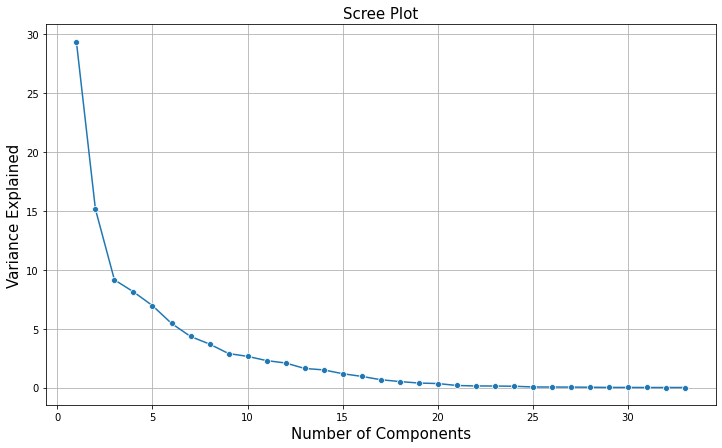

In [58]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y = var_exp, x = range(1, len(var_exp)+1), marker = "o" )
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

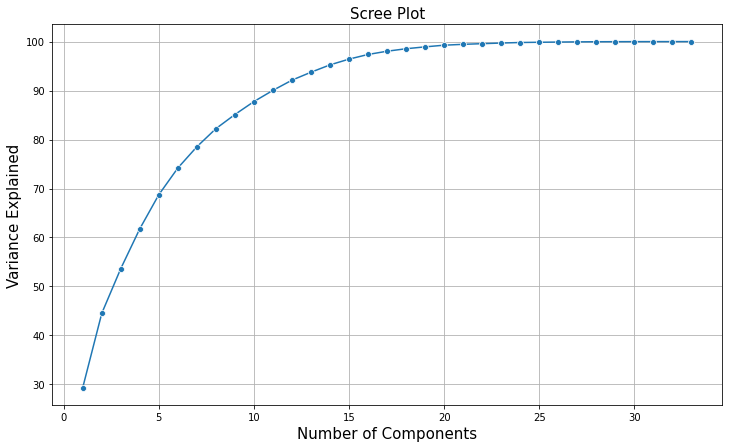

In [59]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y = cum_var_exp, x = range(1, len(cum_var_exp)+1), marker = "o" )
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [62]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 33 to 8)
pca = PCA(n_components=8, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose() # Component output

array([[ 0.13832827,  0.63205268,  1.03854778, ..., -3.01724891,
        -1.64731774, -3.02498793],
       [-3.94762052, -2.86568024, -5.89017883, ...,  0.43477001,
         0.81296655,  0.28690108],
       [ 0.01130851,  1.10242534,  1.81830086, ..., -0.65943335,
         0.07570841,  2.90274012],
       ...,
       [ 0.31988377,  1.56775814,  0.26753095, ..., -0.7899804 ,
        -0.97943608,  0.15714945],
       [ 0.41604043,  0.42580728,  1.84692677, ..., -0.14617257,
         2.29148091,  0.1073373 ],
       [ 0.35617767,  0.46735294, -0.44765723, ..., -0.56497181,
        -1.44013059, -0.73519749]])

In [61]:
# Loading of each feature on the components
pca.components_

array([[ 0.02014627,  0.21744871,  0.21126924, -0.0696896 ,  0.09099176,
         0.14926688,  0.15673719,  0.14735309, -0.04142426,  0.1861108 ,
         0.28038238,  0.27788661,  0.26814394,  0.04890196,  0.1088314 ,
         0.24039174,  0.2747473 ,  0.19577635,  0.03243448,  0.26460352,
         0.2758785 ,  0.06065134,  0.07522952,  0.07326248,  0.09978476,
         0.0897586 ,  0.15498928, -0.0390214 ,  0.24156068,  0.27527696,
         0.16040423,  0.07290875,  0.07374132],
       [-0.10092627,  0.03156662,  0.03520226,  0.30832747, -0.25207128,
        -0.26882099, -0.27394218, -0.27009789,  0.24468839,  0.03629618,
         0.12110679, -0.06101158, -0.06074546, -0.05459196,  0.16142978,
         0.08689961,  0.20563687,  0.04244355, -0.00929268,  0.22731124,
         0.2038083 ,  0.19699083, -0.05478914, -0.12362715, -0.14533296,
        -0.2591793 , -0.27467176,  0.23807634,  0.24167031, -0.03294935,
        -0.11917058,  0.01209948,  0.01085759],
       [ 0.09308731, -0.1099

In [90]:
pca.explained_variance_ratio_

array([0.29373418, 0.15150952, 0.09141408, 0.08128842, 0.06954292,
       0.05446904, 0.04336392, 0.0369296 ])

Let's create a dataframe of component loading against each field and identify the pattern

In [64]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_num_scaled))
df_pca_loading.shape

(8, 33)

In [65]:
df_pca_loading.head(8)

,age,gross_income,nettakehome,balance_tenure,completed_tenure,current_interest_rate,current_interest_rate_max,current_interest_rate_min,current_tenor,diff_emi_amount_max_min,...,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
0,0.020146,0.217449,0.211269,-0.069690,0.090992,0.149267,0.156737,0.147353,-0.041424,0.186111,...,0.073262,0.099785,0.089759,0.154989,-0.039021,0.241561,0.275277,0.160404,0.072909,0.073741
1,-0.100926,0.031567,0.035202,0.308327,-0.252071,-0.268821,-0.273942,-0.270098,0.244688,0.036296,...,-0.123627,-0.145333,-0.259179,-0.274672,0.238076,0.241670,-0.032949,-0.119171,0.012099,0.010858
2,0.093087,-0.109950,-0.114196,-0.250312,0.216828,-0.338159,-0.319893,-0.338019,-0.211668,0.173335,...,0.012728,0.084649,0.183402,-0.322102,-0.132454,-0.097365,0.070336,0.313991,-0.154036,-0.153491
3,-0.186791,-0.171046,-0.172580,0.250056,0.280362,-0.044744,-0.037303,-0.045373,0.363053,-0.008137,...,0.339973,0.310825,0.330703,-0.038568,0.341766,-0.011545,0.168543,-0.114098,0.154762,0.154839
4,0.114120,-0.028422,-0.024229,-0.073722,-0.265057,-0.044565,-0.055266,-0.043110,-0.171761,0.207371,...,0.349290,0.167116,-0.150327,-0.052828,-0.159771,-0.026562,-0.148281,0.019630,0.465086,0.464405
5,0.156776,-0.027349,-0.030312,-0.110107,0.093345,-0.108154,-0.092280,-0.107675,-0.108874,-0.385024,...,-0.087308,-0.230690,0.169668,-0.090052,-0.146470,0.073032,0.169276,0.016759,0.358458,0.359757
6,0.199325,0.243860,0.246847,-0.057523,-0.025598,-0.076700,-0.102373,-0.074294,-0.096345,-0.191685,...,0.191600,0.319972,-0.053403,-0.103258,-0.210156,0.100691,-0.061555,-0.173867,-0.163794,-0.165866
7,-0.145370,0.468927,0.478030,0.038837,0.063039,-0.108197,-0.097704,-0.108582,0.085450,-0.003035,...,0.007227,-0.059848,0.085958,-0.096870,0.147065,-0.086532,0.021001,0.095383,0.107736,0.109175


Let's identify which features have maximum loading across the components.



In [66]:
from matplotlib.patches import Rectangle

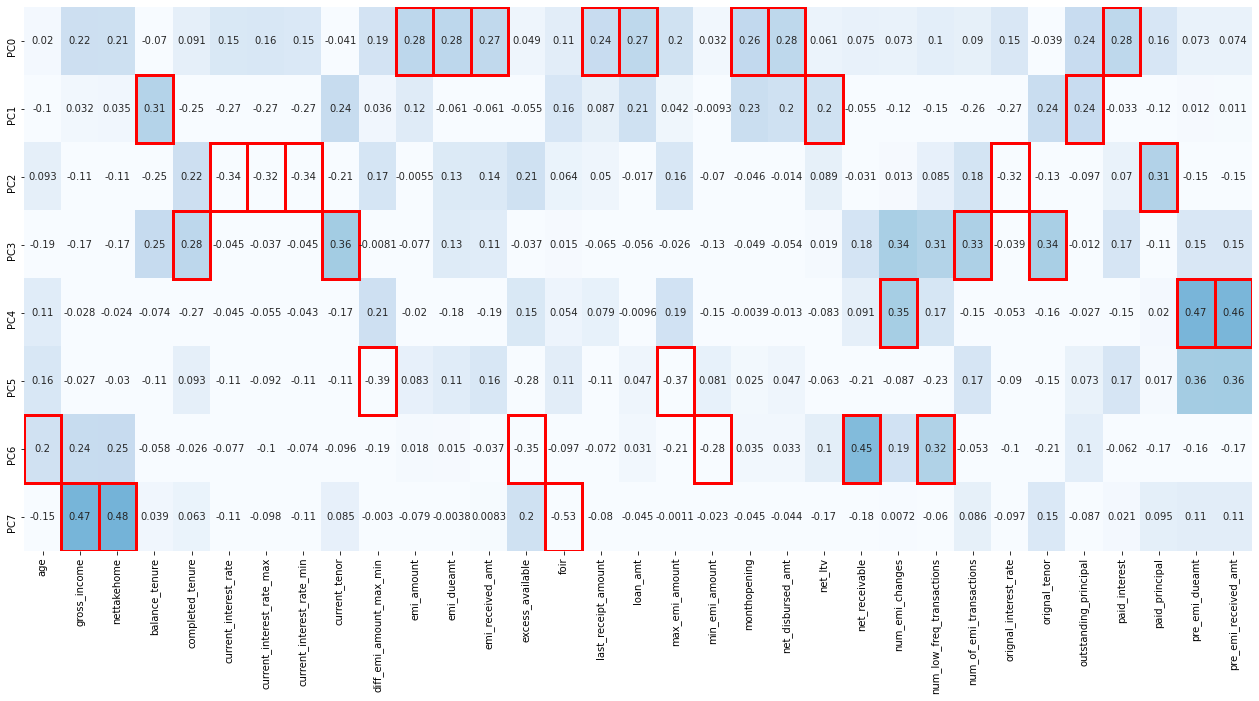

In [67]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [68]:
df_pca = pd.DataFrame(df_pca,columns=['pc_loan_repayment','pc_balance_loan','pc_interest_rate','pc_tenure',
                              'pc_pre_emi','pc_emi','pc_receiveable','pc_income'])
df_pca.head()

,pc_loan_repayment,pc_balance_loan,pc_interest_rate,pc_tenure,pc_pre_emi,pc_emi,pc_receiveable,pc_income
0,0.138328,-3.947621,0.011309,2.544589,-0.750891,0.319884,0.416040,0.356178
1,0.632053,-2.865680,1.102425,1.706172,-0.894925,1.567758,0.425807,0.467353
2,1.038548,-5.890179,1.818301,1.498773,0.398085,0.267531,1.846927,-0.447657
3,3.693353,-3.578944,1.087235,3.726671,-1.030339,-0.074850,1.874251,-0.645492
4,2.381332,-3.702655,0.854477,3.617402,-0.320202,-1.041227,0.328920,0.257505


In [70]:
df_pca.shape

(2319, 8)

### EDA (Categorical Fields & Principal Components)

In [71]:
df_new = pd.concat([df_cat, df_pca], axis=1)

In [72]:
df_new.shape

(2319, 13)

In [73]:
df_new.head()

,loan_account,gender,marital_status,qualification,city,pc_loan_repayment,pc_balance_loan,pc_interest_rate,pc_tenure,pc_pre_emi,pc_emi,pc_receiveable,pc_income
0,LA492,F,M,UG,MADURAI,0.138328,-3.947621,0.011309,2.544589,-0.750891,0.319884,0.416040,0.356178
1,LA498,M,M,GRAD,MADURAI,0.632053,-2.865680,1.102425,1.706172,-0.894925,1.567758,0.425807,0.467353
2,LA500,M,M,UG,MADURAI,1.038548,-5.890179,1.818301,1.498773,0.398085,0.267531,1.846927,-0.447657
3,LA531,M,M,UG,MADURAI,3.693353,-3.578944,1.087235,3.726671,-1.030339,-0.074850,1.874251,-0.645492
4,LA552,M,S,GRAD,MADURAI,2.381332,-3.702655,0.854477,3.617402,-0.320202,-1.041227,0.328920,0.257505


In [74]:
df_new.describe(include='all')

,loan_account,gender,marital_status,qualification,city,pc_loan_repayment,pc_balance_loan,pc_interest_rate,pc_tenure,pc_pre_emi,pc_emi,pc_receiveable,pc_income
count,2319,2319,2319,2319,2319,2.319000e+03,2.319000e+03,2.319000e+03,2.319000e+03,2.319000e+03,2.319000e+03,2.319000e+03,2.319000e+03
unique,2319,2,2,8,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LA5420,M,M,UG,MUMBAI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1994,2086,1548,607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,7.271267e-16,5.168115e-17,9.843116e-17,-6.128010e-18,1.596634e-16,-1.664975e-16,-1.488017e-16,5.788097e-17
std,NaN,NaN,NaN,NaN,NaN,3.114066e+00,2.236509e+00,1.737229e+00,1.638193e+00,1.515225e+00,1.340990e+00,1.196506e+00,1.104175e+00
min,NaN,NaN,NaN,NaN,NaN,-5.761975e+00,-5.973697e+00,-5.116932e+00,-5.280734e+00,-4.500180e+00,-4.743138e+00,-4.100491e+00,-3.840107e+00
25%,NaN,NaN,NaN,NaN,NaN,-2.267257e+00,-1.629814e+00,-1.166888e+00,-1.135981e+00,-9.898574e-01,-7.175728e-01,-7.414753e-01,-7.200439e-01
50%,NaN,NaN,NaN,NaN,NaN,-6.419539e-01,-4.371668e-02,-1.152916e-01,4.656669e-02,-2.549250e-01,5.489084e-02,-1.985178e-02,-6.199159e-02
75%,NaN,NaN,NaN,NaN,NaN,1.617456e+00,1.609900e+00,1.102363e+00,1.122729e+00,7.689656e-01,7.605432e-01,7.320117e-01,6.150100e-01


<AxesSubplot:xlabel='city', ylabel='pc_loan_repayment'>

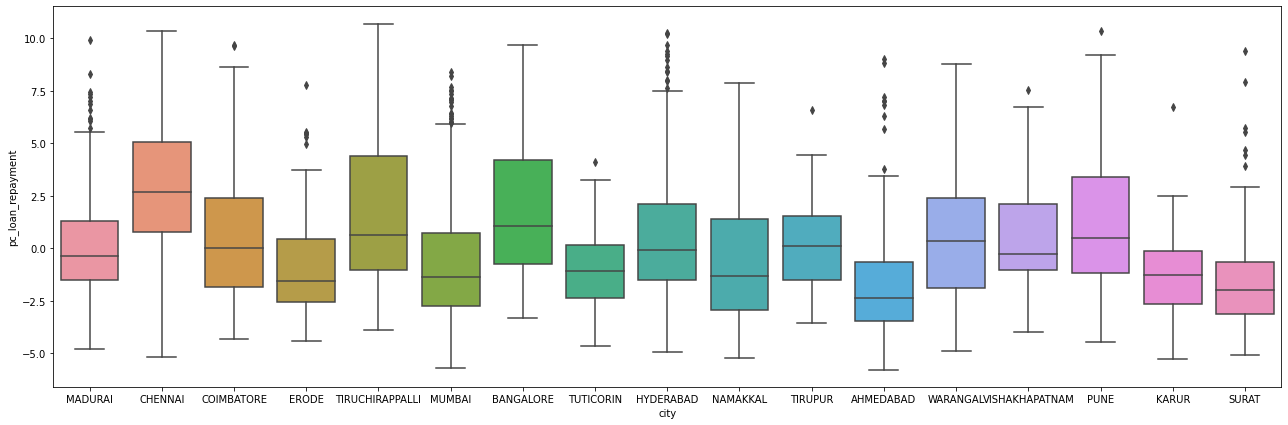

In [75]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='city',y='pc_loan_repayment', data=df_new)

From above plots we observe that for Ahmedabad & Surat the loan repayment amount is comparatively lower than other cities. 

Loan repayment amount is highest for Chennai compared to other cities

<AxesSubplot:xlabel='city', ylabel='pc_interest_rate'>

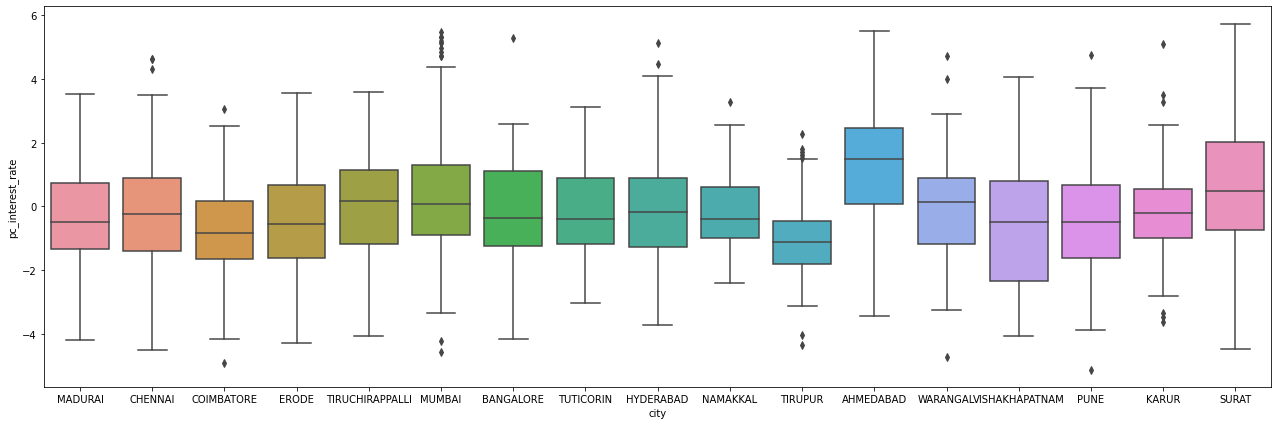

In [76]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='city',y='pc_interest_rate', data=df_new)

Interest rate is highest for Ahmedabad and lowest for Tirupur

<AxesSubplot:xlabel='city', ylabel='pc_pre_emi'>

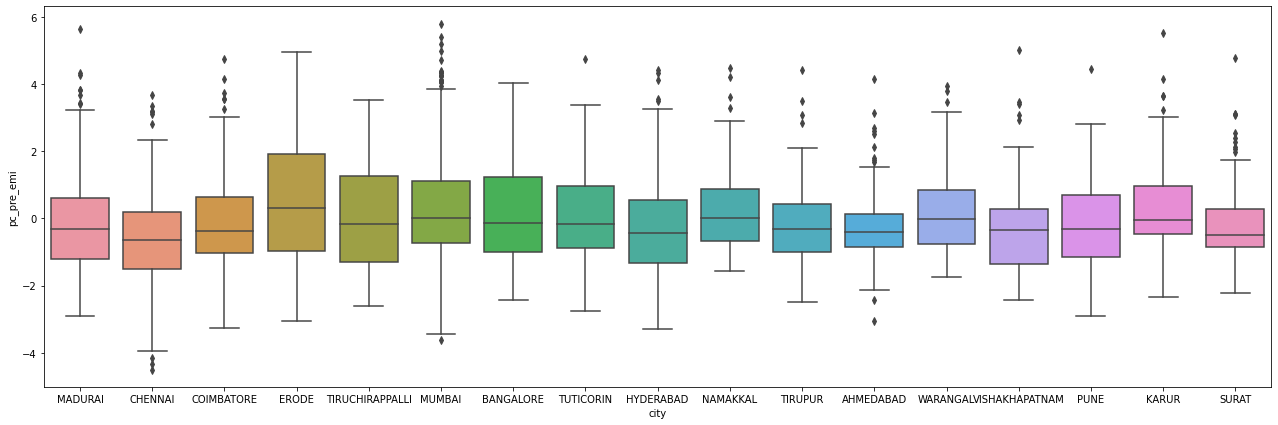

In [77]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='city',y='pc_pre_emi', data=df_new)

City of Erode seems to have highest pre-emi payments

#### Observation

- From above plots we observe that for Ahmedabad city, loan repayment amount is comparatively lower than other cities however, the interest rate charged to the customers is much higher

- For Erode city, loan repayment amount is low, interest rate is comparative high and the pre-emi amount paid by customers from this city is also high

### Apply rules & analyze patterns in data

#### Case 1 - Advance Closure
Customer who 
- has to pay lesser loan, 
- has done some payment as part of pre-emi and 
- has an high income 
have higher chances to do *advance payment* and close the loan in advance thus causing loss to the financial institute

Let's create a subset dataframe *df_adv_closure* which satisfies all above conditions and analyze it further

In [78]:
cond1 = df_new.pc_loan_repayment < df_new.pc_loan_repayment.quantile(0.25) # customers paying lesser loan
cond2 = df_new.pc_pre_emi > df_new.pc_pre_emi.quantile(0.75) # customers who have paid high pre-emi
cond3 = df_new.pc_income > df_new.pc_income.quantile(0.75) # customers who have high income
df_adv_closure = df_new[cond1 & cond2 & cond3] # Find customers satisifying all above conditions

In [79]:
df_adv_closure.index

Int64Index([ 251,  915, 1057, 1148, 1216, 1247, 1408, 1414, 1428, 1486, 1495,
            1496, 1661, 1747, 1782, 1800, 1834, 1840, 1846, 1871, 1899, 2002,
            2032, 2141, 2147, 2163, 2240, 2304],
           dtype='int64')

Above index corresponds to the rows or loan accounts which satisfy the Case 1 conditions. Let's create a new field 'advance_closure' which will hold a value of 1 for above indexed rows

In [80]:
df_adv_closure=df_adv_closure.assign(advance_closure=1)
df_adv_closure.head()

,loan_account,gender,marital_status,qualification,city,pc_loan_repayment,pc_balance_loan,pc_interest_rate,pc_tenure,pc_pre_emi,pc_emi,pc_receiveable,pc_income,advance_closure
251,LA1321,M,S,GRAD,TUTICORIN,-3.236127,-0.631951,-1.971316,3.640110,1.585632,1.882636,-2.349836,1.334191,1
915,LA2868,M,M,GRAD,MADURAI,-2.538345,0.845063,0.497815,3.415984,1.119821,-0.473038,-0.596415,2.228886,1
1057,LA3138,M,M,UG,SURAT,-2.555448,0.845925,-1.644663,2.893056,2.068014,1.878371,-1.452161,0.620491,1
1148,LA3318,M,M,UG,CHENNAI,-2.859567,-2.188669,3.055199,-1.523749,1.014246,0.435528,0.809753,1.142229,1
1216,LA3439,M,M,UG,MUMBAI,-3.061674,1.792790,5.466580,0.712567,1.464098,-2.744298,-1.641138,0.970271,1


Let's merge *advance_closure* field with our original dataframe for the selected index and analyze further 

In [81]:
df_merge = df.merge(df_adv_closure['advance_closure'],left_index=True,left_on=df.index, right_index=True, 
                    right_on=df_adv_closure.index, how='left')
df_merge.head(252)

,loan_account,age,gender,marital_status,qualification,gross_income,nettakehome,balance_tenure,city,completed_tenure,...,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt,advance_closure
0,LA492,39,F,M,UG,63542.344735,63542.344735,111,MADURAI,70,...,10,73,17.479728,180,9.882910e+05,9.340537e+05,212745.625226,39959.331336,39959.331336,NaN
1,LA498,51,M,M,GRAD,81130.025032,81130.025032,107,MADURAI,68,...,11,73,17.479728,180,1.206218e+06,1.069305e+06,295078.188194,78774.632736,78774.632736,NaN
2,LA500,41,M,M,UG,56298.592500,56298.592500,50,MADURAI,70,...,10,73,17.479728,120,7.137100e+05,8.303592e+05,487326.621863,37918.629288,37918.629288,NaN
3,LA531,42,M,M,UG,74314.142100,74314.142100,110,MADURAI,70,...,17,72,17.479728,180,1.744746e+06,1.567354e+06,357068.193072,29375.950152,29375.950152,NaN
4,LA552,27,M,S,GRAD,64255.460240,64255.460240,112,MADURAI,69,...,10,71,17.479728,180,1.502039e+06,1.355995e+06,299516.018579,46048.309200,46048.309200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,LA1309,44,M,M,UG,91110.639510,91110.639510,164,MUMBAI,51,...,7,52,17.479728,180,3.142253e+06,9.194536e+04,10468.535613,27054.762000,27054.762000,NaN
248,LA1310,24,M,S,GRAD,150129.580000,150129.580000,123,CHENNAI,57,...,9,58,18.104004,180,3.691821e+06,2.674090e+06,511806.751178,42344.567496,42344.567496,NaN
249,LA1317,40,F,M,OTHERS,47290.817700,47290.817700,128,MUMBAI,52,...,9,53,17.479728,180,9.093694e+05,1.915338e+05,28940.479137,11811.336096,11811.336096,NaN
250,LA1319,33,M,M,UG,78067.381600,78067.381600,36,TUTICORIN,51,...,1,54,17.479728,120,3.683910e+05,3.669107e+05,457321.724004,29758.029648,29758.029648,NaN


In [83]:
df_merge.advance_closure.fillna(0, inplace= True)

In [84]:
df_merge.advance_closure.value_counts()

0.0    2291
1.0      28
Name: advance_closure, dtype: int64

#### Analyze data for probable customers who may payoff the loan in advance

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='advance_closure', ylabel='num_emi_changes'>

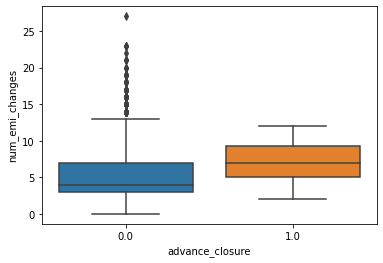

In [85]:
sns.boxplot(df_merge.advance_closure, df_merge.num_emi_changes)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='advance_closure', ylabel='outstanding_principal'>

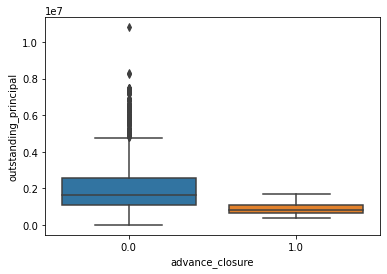

In [87]:
sns.boxplot(df_merge.advance_closure, df_merge.outstanding_principal)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='advance_closure', ylabel='paid_interest'>

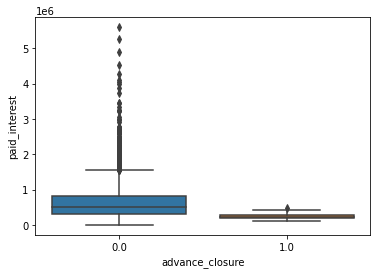

In [89]:
sns.boxplot(df_merge.advance_closure, df_merge.paid_interest)

#### Observation:

28 customers have low outstanding principal, have paid less interest so far and we also see that there are more changes in emi value being paid. Hence, there is high probability that these customers may close the loans in advance

#### Case 2 - Loan Default:

Customers 
- with high loan, 
- low income and 
- high loan interest rate 
are probable customers to default.

Let's create a subset dataframe *df_delay_closure* which satisfies all above conditions and analyze further

In [ ]:
cond1 = df_new.pc_loan_repayment > df_new.pc_loan_repayment.quantile(0.75)# customers paying higher loan
cond2 = df_new.pc_income < df_new.pc_income.quantile(0.25) # customers with lesser income
cond3 = df_new.pc_interest_rate > df_new.pc_interest_rate.quantile(0.75) # customers paying higher interest

df_delay_closure = df_new[cond1 & cond2 & cond3]# Find customers satisifying all above conditions

In [ ]:
df_delay_closure.index

Above index corresponds to the rows or loan accounts which satisfy the Case 2 conditions. Let's create a new field *'delay_closure'* which will hold a value of 1 for above indexed rows

In [ ]:
df_delay_closure = df_delay_closure.assign(delay_closure=1)
df_delay_closure.head()

Let's merge the *df_delay_closure* with original dataframe *'df'* and just add the *'delay_closure'* field 

In [ ]:
df_merge = df.merge(df_delay_closure['delay_closure'],left_index=True,left_on=df.index, right_index=True, 
                    right_on=df_delay_closure.index, how='left')
df_merge.head(79)

In [ ]:
df_merge.delay_closure.fillna(0, inplace=True)

In [ ]:
df_merge.delay_closure.value_counts()

#### Analyze data for probable customers who may default

In [ ]:
sns.(df_merge.delay_closure, df_merge.net_ltv)

In [ ]:
sns.boxplot(df_merge., df_merge.outstanding_principal)

In [ ]:
sns.boxplot(df_merge.delay_closure, df_merge.paid_interest)

#### Observation:


### Conclusion

